In [42]:
import pandas as pd 
import numpy as np  

import seaborn as sns


In [43]:
df=sns.load_dataset('iris') 
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [45]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [46]:
df=df[df['species']!='setosa']

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [48]:
df['species'].map({'versicolor':1,'virginica':0})

50     1
51     1
52     1
53     1
54     1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 100, dtype: int64

In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [50]:
### split dataset into independent and dependent features
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [51]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
y

50     versicolor
51     versicolor
52     versicolor
53     versicolor
54     versicolor
          ...    
145     virginica
146     virginica
147     virginica
148     virginica
149     virginica
Name: species, Length: 100, dtype: object

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [54]:
from sklearn.linear_model import LogisticRegression 
classifier=LogisticRegression() 

In [55]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10 ,20,30,40,50,80],'max_iter':[100,200,300]}

In [56]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [57]:
classifier_regressor.fit(X_train,y_train)   

C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\s

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 2, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [58]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [59]:
print(classifier_regressor.best_score_)

0.9733333333333334


In [60]:
y_pred=classifier_regressor.predict(X_test)

In [61]:
##accuracy score 
from sklearn.metrics import accuracy_score,classification_report

In [62]:
score=accuracy_score(y_test,y_pred)
print(score)

0.92


In [63]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

  versicolor       0.93      0.93      0.93        14
   virginica       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



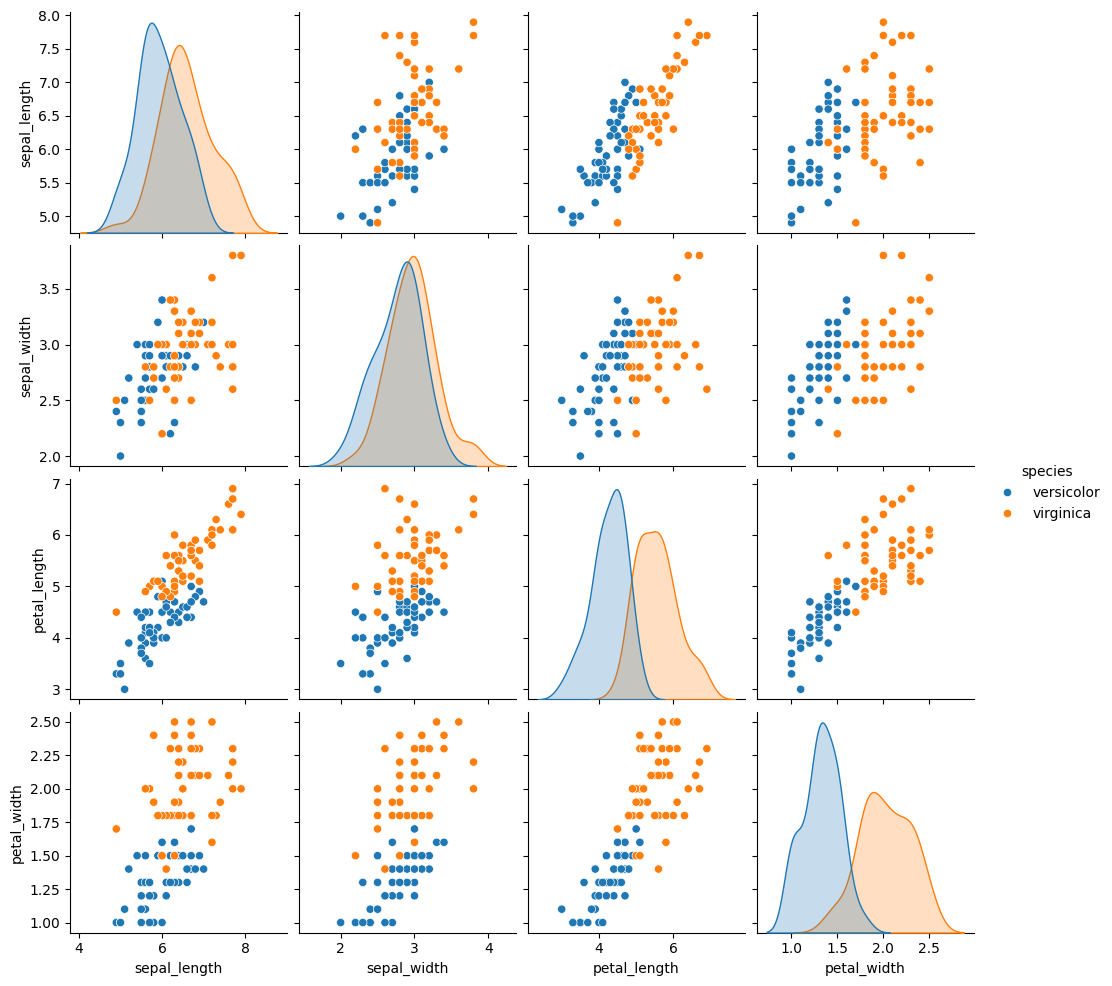

In [64]:
#EDA
sns.pairplot(df,hue='species')  

In [66]:
df.select_dtypes(include=[np.number]).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.553855,0.828479,0.593709
sepal_width,0.553855,1.000000,0.519802,0.566203
petal_length,0.828479,0.519802,1.000000,0.823348
petal_width,0.593709,0.566203,0.823348,1.000000
